# Raster Plot Functions

In [3]:
#Import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta

In [4]:
#Download data
df1 = pd.read_csv("Practice 3_data1.csv")

### Clean and transform data frame to useable format

Overall Goal: raster figure with day-to-day plots containing activity (no. of crossings) on the y-axis and time (hour) on the x-axis.

Necessary components: 
    - Readable and callable time and date information
    - Time elapsed in hours
    - Days elapsed or day labels

In [5]:
#Combine Date and Time to one, new column
df1["date_time"] = df1["Date"] + " " + df1["Time"]
df1["date_time"] = pd.to_datetime(df1["date_time"])

In [6]:
#Add new time elapsed column
x = pd.to_datetime(df1["date_time"])- pd.to_datetime(df1.at[0, "date_time"])
df1["timedelta"] = x
#Convert time elapsed into hours
df1["time_hour"] = df1["timedelta"].dt.total_seconds().div(3600)

In [7]:
#Add days elasped column
days = pd.to_datetime(df1["date_time"])- pd.to_datetime(df1.at[0, "date_time"])
df1["days_since"] = days
df1["days_since"] = df1["days_since"].dt.days
df1

,Date,Time,lights,s2,date_time,timedelta,time_hour,days_since
0,10-Jun-17,12:25:00,1,3,2017-06-10 12:25:00,0 days 00:00:00,0.000000,0
1,10-Jun-17,12:26:00,1,3,2017-06-10 12:26:00,0 days 00:01:00,0.016667,0
2,10-Jun-17,12:27:00,1,1,2017-06-10 12:27:00,0 days 00:02:00,0.033333,0
3,10-Jun-17,12:28:00,1,5,2017-06-10 12:28:00,0 days 00:03:00,0.050000,0
4,10-Jun-17,12:29:00,1,0,2017-06-10 12:29:00,0 days 00:04:00,0.066667,0
...,...,...,...,...,...,...,...,...
25999,28-Jun-17,13:44:00,0,0,2017-06-28 13:44:00,18 days 01:19:00,433.316667,18
26000,28-Jun-17,13:45:00,0,0,2017-06-28 13:45:00,18 days 01:20:00,433.333333,18
26001,28-Jun-17,13:46:00,0,0,2017-06-28 13:46:00,18 days 01:21:00,433.350000,18
26002,28-Jun-17,13:47:00,0,0,2017-06-28 13:47:00,18 days 01:22:00,433.366667,18


## Function that filters data frame

In [8]:
def period_data(frame, data, timedata, timeperiod1, timeperiod2):
    y = frame[data].loc[(frame[timedata]>=timeperiod1) & (frame[timedata]<=timeperiod2)]
    x = frame[timedata].loc[(frame[timedata]>=timeperiod1) & (frame[timedata]<=timeperiod2)]
    return x, y

In [9]:
period_data(df1, "s2", "time_hour", 0, 24)

(0        0.000000
 1        0.016667
 2        0.033333
 3        0.050000
 4        0.066667
           ...    
 1436    23.933333
 1437    23.950000
 1438    23.966667
 1439    23.983333
 1440    24.000000
 Name: time_hour, Length: 1441, dtype: float64,
 0       3
 1       3
 2       1
 3       5
 4       0
        ..
 1436    0
 1437    0
 1438    0
 1439    0
 1440    0
 Name: s2, Length: 1441, dtype: int64)

## Function that plots data into Raster plot

In [10]:
def one_raster(frame, activitydata, timedata, timeperiod1, timeperiod2, xlabel, ylabel):
    time, activity = period_data(frame, activitydata, timedata, timeperiod1, timeperiod2)
    plt.figure(figsize=(7,1))
    plot = plt.plot(time, activity, color='black')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return plot

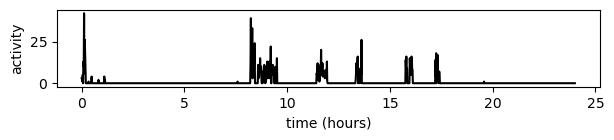

In [11]:
one_raster(df1, "s2", "time_hour", 0, 24, "time (hours)", "activity")

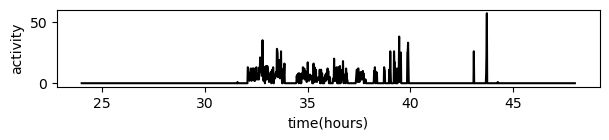

In [12]:
one_raster(df1, "s2", "time_hour", 24, 48, "time(hours)", "activity")

## Multiday Raster Plot

In [13]:
df2 = pd.read_csv("Practice 3_data1.csv")
#Combine date and time columns and put in datetime format
df2["date_time"] = df2["Date"] + " " + df1["Time"]
df2["date_time"] = pd.to_datetime(df1["date_time"])
#Set datetime index & cleanup df
df2 = df2.set_index(pd.DatetimeIndex(df2["date_time"]))
df2 = df2.drop(["Date", "Time", "date_time"], axis = 1)
df2

,lights,s2
date_time,,
2017-06-10 12:25:00,1,3
2017-06-10 12:26:00,1,3
2017-06-10 12:27:00,1,1
2017-06-10 12:28:00,1,5
2017-06-10 12:29:00,1,0
...,...,...
2017-06-28 13:44:00,0,0
2017-06-28 13:45:00,0,0
2017-06-28 13:46:00,0,0


IndexError: index 20 is out of bounds for axis 0 with size 20

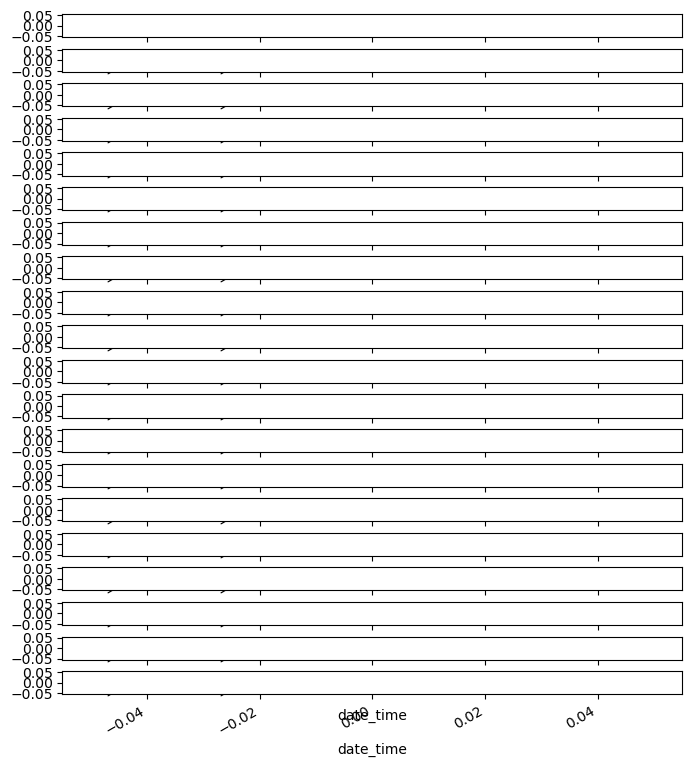

In [47]:
#Isolate days and time
df2["day"]=df2.index.day
df2['time']=df2.index.strftime('%H:%M')
#Count the number of days present in the dataset
days2 = df2['day'].unique()
n = len(days2)+1
row=0
#Create a figure with same number of subplots as days 
fig, axes = plt.subplots(n, figsize=(8, 10))
s2=df2.columns[1]
#Loop through days to plot
for day in days:
    slic = df2[df2.day == day]
    slic[s2].plot(x = df2.time, y=df2[s2], ax=axes[row])
    plt.subplots_adjust(hspace = 0.5)
    row+=1

In [15]:
slic

,lights,s2,day,time
date_time,,,,
2017-06-10 12:25:00,1,3,1,12:25
2017-06-10 12:26:00,1,3,1,12:26
2017-06-10 12:27:00,1,1,1,12:27
2017-06-10 12:28:00,1,5,1,12:28
2017-06-10 12:29:00,1,0,1,12:29
...,...,...,...,...
2017-06-10 23:55:00,0,2,1,23:55
2017-06-10 23:56:00,0,4,1,23:56
2017-06-10 23:57:00,0,3,1,23:57
